## Import tensorflow (v2) and keras (tensorflow version)

In [3]:
import tensorflow as tf
from tensorflow import keras
print('tensorflow version', tf.__version__)
print('keras version', keras.__version__)

tensorflow version 2.0.0
keras version 2.2.4-tf


## Load the MNIST fashion dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train_full.dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


## Create a validation dataset and scale the images

In [10]:
boundary = 5000
scale_factor = 255.0

X_val, X_train = X_train_full[:boundary] / scale_factor, X_train_full[boundary:] / scale_factor
y_val, y_train = y_train_full[:boundary], y_train_full[boundary:]

print(X_train.shape)
print(X_val.shape)

(55000, 28, 28)
(5000, 28, 28)


In [11]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_train[0]]

'Coat'

## Create a neural network (keras API)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Just flatten the images
model.add(keras.layers.Dense(300, activation='relu')) # Separatly includes bias term
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary() # None is the batch size
                # Note params includes bias terms

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Getting access to a layer

In [15]:
model.layers[1].name

'dense'

### Getting access to the parameters

In [17]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.06903665,  0.01544227, -0.06196058, ..., -0.03824129,
        -0.04859913,  0.01826756],
       [ 0.05047546, -0.07328348, -0.03286102, ...,  0.03796715,
         0.01461924,  0.0638905 ],
       [ 0.05276811,  0.02384318, -0.00105748, ...,  0.03602381,
         0.06977761,  0.012523  ],
       ...,
       [-0.04253145, -0.04517778, -0.00632489, ..., -0.0109662 ,
         0.06796508, -0.05262314],
       [-0.00085714,  0.04477123, -0.0380993 , ...,  0.03386887,
        -0.06325466, -0.00278991],
       [-0.00489642,  0.01934295,  0.07344814, ..., -0.03271018,
         0.00857079, -0.0485448 ]], dtype=float32)

## Compile the model

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
             optimiser='sgd',
             metrics=['accuracy'])

## Train the model

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.5020 - accuracy: 0.8166 - val_loss: 0.3901 - val_accuracy: 0.8660
Epoch 2/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3892 - accuracy: 0.8616 - val_loss: 0.4143 - val_accuracy: 0.8564
Epoch 3/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3692 - accuracy: 0.8726 - val_loss: 0.3845 - val_accuracy: 0.8672
Epoch 4/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3547 - accuracy: 0.8786 - val_loss: 0.3840 - val_accuracy: 0.8768
Epoch 5/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3453 - accuracy: 0.8828 - val_loss: 0.4220 - val_accuracy: 0.8704
Epoch 6/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3382 - accuracy: 0.8857 - val_loss: 0.4762 - val_accuracy: 0.8646
Epoch 7/30
55000/55000 [==============================] 

## Plot the training loss and accuracy

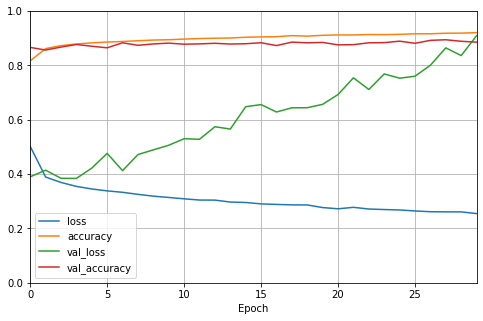

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

## Evaluate on the test dataset

In [26]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[272.4864709793091, 0.8752]

## Predict using the model

In [27]:
X_new = X_test[:3] # Just using the first 3 training images for now
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [30]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')